In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [2]:
mode = 'fashion mnist'

if mode == 'mnist':
    mnist = tf.keras.datasets.mnist
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    print('MNIST')
elif mode == 'fashion mnist':
    fashion_mnist = tf.keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    print('Fashion MNIST')
else:
    print('!'*30+' WRONG ENTRY '+'!'*30)

Fashion MNIST


In [3]:
train_images = train_images / 255.0

test_images = test_images / 255.0

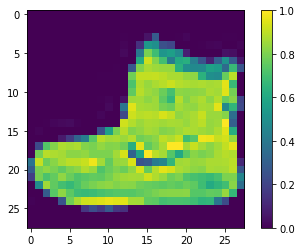

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
if mode == 'mnist':
    class_names=['0','1','2','3','4','5','6','7','8','9',]
else:
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

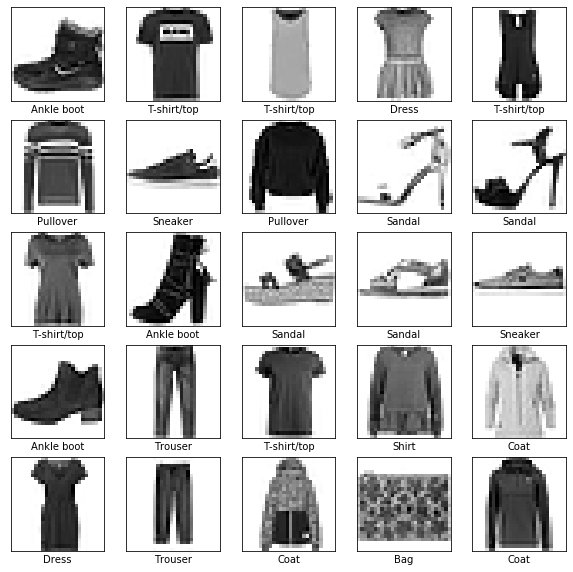

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.90:
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True
    
callbacks = myCallback()

In [10]:
import logging
logging.getLogger('tensorflow').disabled = True #Remove Warnings

model.fit(train_images, train_labels, epochs=30, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 52us/sample - loss: 0.5494 - accuracy: 0.8058
Epoch 2/30
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4141 - accuracy: 0.8522
Epoch 3/30
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3800 - accuracy: 0.8617
Epoch 4/30
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3580 - accuracy: 0.8687
Epoch 5/30
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3443 - accuracy: 0.8743
Epoch 6/30
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3291 - accuracy: 0.8784
Epoch 7/30
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3217 - accuracy: 0.8824
Epoch 8/30
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3123 - accuracy: 0.8841
Epoch 9/30
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3046 - accuracy: 0.8879
Epoch 10/30
60

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3348 - accuracy: 0.8848

Test accuracy: 0.8848


In [12]:
predictions = model.predict(test_images)

In [13]:
np.argmax(predictions[0])

9

In [14]:
test_labels[0]

9

In [15]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

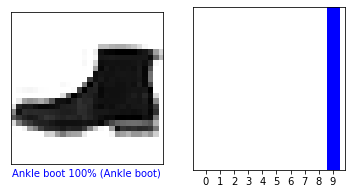

In [16]:
i = 5895
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

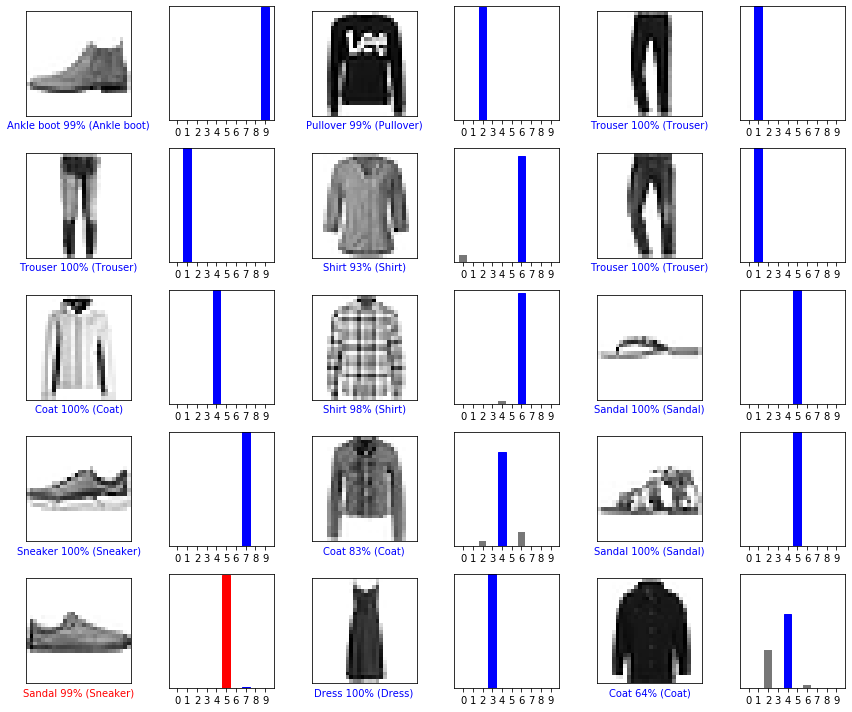

In [17]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [18]:
img = np.reshape(test_images[0], (1,28,28))
img.shape

(1, 28, 28)

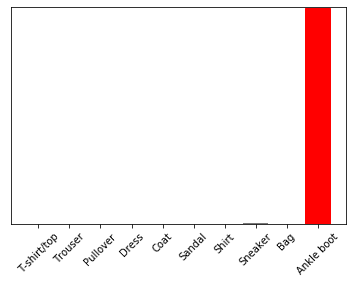

In [19]:
predictions_single = model.predict(img)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)